# Proyek Analisis Data: E-Commerce Pubic Dataset
- **Nama:** Moehammad Agung Putra Darmawan
- **Email Dicoding:** agungferi1972@gmail.com
- **Email Bangkit:** m335b4ky2536@bangkit.academy
- **ID Dicoding:** mmhdagungg

## Menentukan Pertanyaan Bisnis

- Produk manakah yang paling banyak terjual dan paling sedikit terjual? berapa jumlah produk terjual terbanyak dalam rentang perbulan?
- lokasi mana yang rata rata customernnya paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_data = "/content/drive/My Drive/Bangkit/data/"

# membaca data
orders = pd.read_csv(dir_data + "orders_dataset.csv")
payments = pd.read_csv(dir_data + "order_payments_dataset.csv")
items = pd.read_csv(dir_data + "order_items_dataset.csv")
customers = pd.read_csv(dir_data + "customers_dataset.csv")
reviews = pd.read_csv(dir_data + "order_reviews_dataset.csv")
products = pd.read_csv(dir_data + "products_dataset.csv")
categories = pd.read_csv(dir_data + "product_category_name_translation.csv")
geolocation = pd.read_csv(dir_data + "geolocation_dataset.csv")
sellers = pd.read_csv(dir_data + "sellers_dataset.csv")

data = {
    "orders" : orders,
    "payments" : payments,
    "items" : items,
    "customers" : customers,
    "reviews" : reviews,
    "products" : products,
    "category" : categories,
    "geolocation" : geolocation,
    "sellers" : sellers
}

In [4]:
data["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
data["payments"].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
data["items"].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
data["customers"].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
data["reviews"].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
data["products"].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Terdapat missing value pada review

### Assessing Data

####Cek Tipe Data

In [10]:
data["category"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [11]:
data["customers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
data["geolocation"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
data["items"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
data["orders"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
data["payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
data["products"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
data["reviews"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
data["sellers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Cek Duplikat

In [19]:
data["category"].duplicated().sum()

0

In [20]:
data["customers"].duplicated().sum()

0

In [21]:
data["geolocation"].duplicated().sum()

261831

In [22]:
data["items"].duplicated().sum()

0

In [23]:
data["orders"].duplicated().sum()

0

In [24]:
data["payments"].duplicated().sum()

0

In [25]:
data["products"].duplicated().sum()

0

In [26]:
data["reviews"].duplicated().sum()

0

In [27]:
data["sellers"].duplicated().sum()

0

**Insight:**
- Ditemukan bahwa terdapat duplikasi pada geo location.

####Cek nilai yang hilang/missing value

In [28]:
# mempercepat pengecekan menggunakan for loop
jumlah_null = {}

for df_name, df in data.items():
  jumlah_null[df_name] = df.isnull().sum()
  print(f"Jumlah missing value pada {df_name}:")
  print(jumlah_null[df_name])
  print()

Jumlah missing value pada orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah missing value pada payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah missing value pada items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah missing value pada customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah missing value pada reviews:
review_id 

**Insight:**
- Ditemukan bahwa terdapat missing value pada order, review, product.

### Cleaning Data

####Cleaning Data Order

In [29]:
# print data berdasarkan status
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [30]:
# menghapus pesanan yang tidak terkirim
delivered = data["orders"]["order_id"][data["orders"]["order_status"] != "delivered"].values
# menyisakan pesanan yang berstatus delivered
for key, value in data.items():
  if "order_id" in value.columns:
    value.drop(value.loc[value["order_id"].isin(delivered)].index, inplace=True)

In [31]:
# cek nilai yang kosong pada setiap dataset
for key, value in data.items():
    for col in value.columns:
        # print only col names where there are nans
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737


In [32]:
print("Terdapat " + str(data["orders"].order_delivered_customer_date.isnull().sum()) + " order tanpa tanggal pengiriman")

Terdapat 8 order tanpa tanggal pengiriman


In [33]:
# menghapus pesanan yang tidak ada tanggal pengiriman
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

In [34]:
# buat kolom baru = ketepatan waktu pengiriman
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

In [35]:
data["orders"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96470 non-null  object
 1   customer_id                    96470 non-null  object
 2   order_status                   96470 non-null  object
 3   order_purchase_timestamp       96470 non-null  object
 4   order_approved_at              96456 non-null  object
 5   order_delivered_carrier_date   96469 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96470 non-null  object
 8   delivered_on_time              96470 non-null  object
dtypes: object(9)
memory usage: 7.4+ MB


####Cleaning Data Review

In [36]:
# karena sebesar 88% review title kosong, maka akan saya hapus
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

In [37]:
# mengisi kolom review comment yang kosong dengan 0 dan 1 jika ada review
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

In [38]:
data["reviews"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96353 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                96353 non-null  object
 1   order_id                 96353 non-null  object
 2   review_score             96353 non-null  int64 
 3   review_comment_message   96353 non-null  int64 
 4   review_creation_date     96353 non-null  object
 5   review_answer_timestamp  96353 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.1+ MB


####Cleaning Data Product

In [39]:
# karena panjang nama produk dan deskripsi produk tidak terlalu penting maka akan saya hapus
product_drop_cols = ["product_name_lenght",
                     "product_description_lenght",
                     "product_weight_g",
                     "product_length_cm",
                     "product_height_cm",
                     "product_width_cm"]

data["products"].drop(product_drop_cols, axis= 1, inplace= True)

In [40]:
data["products"].isna().sum()

,0
product_id,0
product_category_name,610
product_photos_qty,610


In [41]:
# mengisi nilai kosong pada product_category_name dengan "other"
data["products"]["product_category_name"].fillna(value="other", inplace=True)

<ipython-input-41-9aae39daf895>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["products"]["product_category_name"].fillna(value="other", inplace=True)


In [42]:
# mengisi nilai kosong pada product_photos_qty dengan "0"
data["products"]["product_photos_qty"].fillna(value=0, inplace=True)

<ipython-input-42-74174848d1b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["products"]["product_photos_qty"].fillna(value=0, inplace=True)


In [43]:
data["products"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_photos_qty     32951 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


####Cleaning Data Geo Location

In [44]:
# menghapus data geoloction yang terdapat duplikasi
data["geolocation"].drop_duplicates(inplace=True)

In [45]:
data["geolocation"].duplicated().sum()

0

**Insight:**
- menghapus kolom title review karena sebagian besar kosong
- Mengganti kolom yang kosong pada comment review dengan 0
- menghapus kolom yang tidak diperlukan pada product
- mengisi nilai yang kosong pada product_category_name dengan 0
- mengisi nilai yang kosong pada product_photo dengan 0
- menghapus duplikasi pada geolocation

## Exploratory Data Analysis (EDA)

### Explore Customer

In [46]:
data["customers"].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
34071,e6305a0a9355e91aad86e234263a41aa,ff4b2772a9368e8b30a1ebd484de12c9,36035,juiz de fora,MG
56058,d8e1d69f3909531253a5de372a66af7c,c31f1aca27fa1bb567a5e9d4aff0812b,6900,embu-guacu,SP
58264,fa3e181e11d9ccc0daf16b77fdb5ae05,87bdeba3e1eea52846d4acba15600743,37557,pouso alegre,MG
68603,dd940eccd485dc083b0e733b37282ea4,f24c728c9920607e93e77ec8cc6dbcb5,53900,ilha de itamaraca,PE
74044,15284bd1d03bc96b99f4b60df9f651d8,8ed59382bc7f2a312d62671973568c4f,20231,rio de janeiro,RJ


In [47]:
# customer berdasarkan kota
data["customers"].groupby("customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [48]:
# data customer berdasarkan state
data["customers"].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Berdasarkan kota paling banyak berada di sao paolo dan terendah berada di ibiria, rio espera, rios dos indios, rios dos cedros, lagoao
- Berdasarkan state paling banyak berada di sao paolo, dan terendah berada di Roraima

###Explore Orders

In [49]:
data["orders"].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
97331,3c608a571543f2f2b96f2e6cb3a2d10a,b96d49fc07d7b581c713d54f1864f1cf,delivered,2017-12-29 14:26:50,2017-12-29 14:34:23,2018-01-02 18:54:19,2018-01-23 20:22:58,2018-02-01 00:00:00,On Time
80617,542ed9dd96bd38be14a8dfa8abc13065,f0e28113cd4ad5a6e901d09c7d1b5df4,delivered,2018-07-18 10:33:46,2018-07-19 02:50:23,2018-07-19 12:15:00,2018-07-23 18:51:50,2018-08-01 00:00:00,On Time
84027,4ea1ece1ec047c5584158141afd4c500,937fd75e8fa32e22ad08d0f833c5d593,delivered,2017-11-26 20:44:34,2017-11-26 20:55:26,2017-11-29 00:24:25,2017-12-12 22:15:14,2017-12-12 00:00:00,Late
83172,c9ecb640dff0357ce506afbcb9dcb76b,0794e4b99fb7375f4189f2f9d1b4c027,delivered,2018-05-26 00:50:30,2018-05-26 01:11:57,2018-05-30 12:07:00,2018-06-12 17:46:48,2018-07-18 00:00:00,On Time
97350,2d14badae001e6b55cd0c31238e284d9,f09e9e19fc45ed2130b6230a186ca831,delivered,2017-06-20 14:28:11,2017-06-20 14:43:10,2017-06-22 14:07:52,2017-06-30 14:22:51,2017-07-12 00:00:00,On Time


In [50]:
data["orders"]["delivered_on_time"].describe()

,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


**Insight:**
- dari 96470 order terdapat 88644 yang on time

###Explore Payments



In [51]:
data["payments"].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
77688,8adb87b0bb81da96d28e6cfaa033a40d,1,credit_card,1,89.17
85545,82121ebedf0f27bfb35630958489c7ea,1,credit_card,6,279.05
26022,3937b5e90887b4a6c5e4102865c4338f,1,credit_card,2,21.78
74,42f5954cda381bd032934ee38c453711,1,credit_card,8,402.42
55573,cac0cf69e6b636454b35048fac095f75,1,credit_card,4,316.64


In [52]:
# mengurutkan berdasarkan type pembayaran
data["payments"].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


**Insight:**
- Paling banyak membayar menggunakan credit card dan terendah menggunakan debit card

###Explore Review

In [53]:
data["reviews"].sample(5)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
17708,04f22dd67b925de9b6b46d4691a60511,8e3e95c75ca8b9168011d70008721a8e,5,0,2018-06-19 00:00:00,2018-06-20 02:20:21
46925,85cd8ee1e2af04d36f83d101969d335c,4296bf3920be4eaa22d4f0cd0c3467b9,1,1,2018-05-19 00:00:00,2018-05-22 14:43:56
70955,86c3bd4572b8ec33b444c3a272107826,d379476af4ac3bc71f0f857e9f2827ef,5,0,2018-08-07 00:00:00,2018-08-11 10:26:10
1833,5ad4323c774d87ef0f6f06fb985907fc,2e506fd7d44cb2a909964a9328d86e01,4,0,2017-07-11 00:00:00,2017-07-12 20:33:03
26312,7a1d72256e453d68102b13e7fab43806,d7f7e1d5e79250921c5be8d5ad0d4824,4,0,2018-08-30 00:00:00,2018-09-03 17:25:19


In [54]:
# mengurutkan berdasarkan review score
data["reviews"].groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56667
4,18862
1,9310
3,7889
2,2911


**Insight**
- paling banyak diperoleh ialah score 5 dengan 56667

###Explore Customer dan Orders

In [55]:
# menggabungkn data customer dan order

customers_orders_df = pd.merge(
    left=data["customers"],
    right=data["orders"],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,On Time


###Explore Payment dan Review

In [56]:
# menggabungkan data payment dan review
payments_reviews_df = pd.merge(
    left=data["payments"],
    right=data["reviews"],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21 00:00:00,2017-12-22 01:10:39


In [57]:
# mengurutkan berdasarkan payment value
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18 00:00:00,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27 00:00:00,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04 00:00:00,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaN
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06 00:00:00,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07 00:00:00,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23 00:00:00,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08 00:00:00,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03 00:00:00,2018-02-11 17:34:29


In [58]:
# mengurutkan payment value berdasarkan payment type
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

**Insight**
- Paling banyak menggunakan credit card sebesar 13664

###Menggabungkan custmer_order dengan payment_review

In [59]:
# penggabungan customer_order dan payment_review
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10 00:00:00,2018-08-17 01:59:52


###Explore Item dan Seller

In [60]:
# merge item dan seller
item_seller_df = pd.merge(
    left=data["items"],
    right=data["sellers"],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [61]:
# mengurutkan berdasarkan kota seller
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(5)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50


In [62]:
# mengurutkan berdasarkan state seller
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(5)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163


**Insight**
- Berdasarkan city, penjual paling banyak berada di sao paolo
- Berdasarkan state, penjual paling banyak berada di rio de janiero

###Explore product dan category

In [63]:
# merge product dan category
product_df = pd.merge(
    left=data["products"],
    right=data["category"],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [64]:
# mengurutkan berdasarkan product_category_name
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(5)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335


###Menggbungkan item_seller dan product_category

In [65]:
# merge item_seller dan product
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [66]:
# mengurutkan berdasarkan price
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# mengurutkan product_category_name_english dengan harga tertinggi dan terendah
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

###Explore Geolocation

In [68]:
data["geolocation"].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
104217,4726,-23.643333,-46.710697,sao paulo,SP
762404,65916,-5.533903,-47.487347,imperatriz,MA
502260,26950,-22.435326,-43.425251,paty do alferes,RJ
474473,24346,-22.934183,-42.998184,niteroi,RJ
482441,25020,-22.787039,-43.310863,duque de caxias,RJ


In [69]:
# mengurutkn berdasarkan geolocation_zip_code_prefix
data["geolocation"].groupby("geolocation_zip_code_prefix").size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


###Explore All Data

In [70]:
# menggabungkan semua data
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [71]:
# menghapus duplikasi
all_data_df = all_data.drop_duplicates("order_id")
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96471 non-null  object 
 1   customer_unique_id             96471 non-null  object 
 2   customer_zip_code_prefix       96471 non-null  int64  
 3   customer_city                  96471 non-null  object 
 4   customer_state                 96471 non-null  object 
 5   order_id                       96470 non-null  object 
 6   order_status                   96470 non-null  object 
 7   order_purchase_timestamp       96470 non-null  object 
 8   order_approved_at              96456 non-null  object 
 9   order_delivered_carrier_date   96469 non-null  object 
 10  order_delivered_customer_date  96470 non-null  object 
 11  order_estimated_delivery_date  96470 non-null  object 
 12  delivered_on_time              96470 non-null  ob

In [72]:
# mengurutkan payment_value dan order_id berdasarkan customer_state
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


**Insight**
- payment value terbanyak berada di state sao paulo

In [73]:
# simpan data
output_csv_path = "drive/My Drive/Bangkit/data/df.csv"
all_data_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Produk manakah yang paling banyak terjual dan paling sedikit terjual? berapa jumlah produk terjual terbanyak dalam rentang perbulan?

In [74]:
# merge data items dan product berdasarkan product id dan
# hanya mengambil data yang cocok pada kedua data tersebut
items_product = data['items'].merge(data['products'], on= 'product_id', how= 'inner')

# merge data orders dengan items_product berdasarkan oder_id
# dan hanya mengambil data yang cocok pada kedua data tersebut
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

# hitung penjualan dan rata rata
product_revenue = orders_ip.pivot_table(index=['product_id'], aggfunc= {'order_item_id': 'sum', 'price':'mean'})
# hitung total pendapatan per produk
product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']
# ubah kolom order_id menjadi sell_probability
product_revenue.rename(columns={'order_item_id':'sell_probability'}, inplace= True)
# hitung probabilitas penjualan produk
product_revenue['sell_probability'] = product_revenue['sell_probability'] / len(product_revenue)
# mengurutkan produk berdasarkan tota pendapatan
product_revenue.sort_values(by='total', ascending= False)

,sell_probability,price,total
product_id,,,
bb50f2e236e5eea0100680137654686c,0.006643,327.628866,70112.577320
5769ef0a239114ac3a854af00df129e4,0.001118,1680.000000,60480.000000
6cdd53843498f92890544667809f1595,0.004998,350.668627,56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4,0.011082,137.411325,49055.843133
99a4788cb24856965c36a24e339b6058,0.016484,88.154423,46809.998868
...,...,...,...
8a3254bee785a526d548a81a9bc3c9be,0.000124,0.850000,3.400000
2e8316b31db34314f393806fd7b6e185,0.000031,2.990000,2.990000
680cc8535be7cc69544238c1d6a83fe8,0.000031,2.900000,2.900000


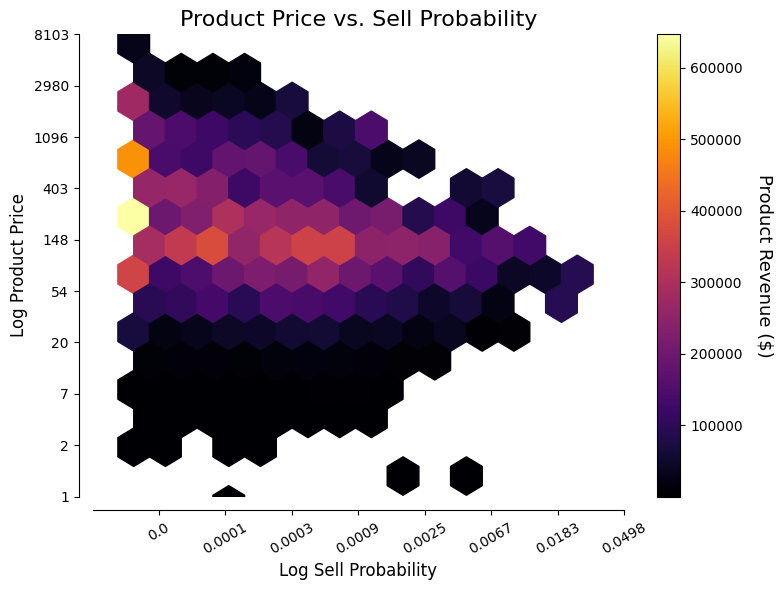

In [75]:
# atur desain sumbu plot
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# hitung probabilitas penjualanan harga produk
x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

# atur tampilan plot
fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

# limit sumbur x & y
plt.xlim(-11, -3)
plt.ylim(0, 9)

plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='inferno')

cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue ($)', rotation=270, labelpad=22, fontsize=13)

# menjaga element pada plot tidak berantakan
plt.tight_layout()
plt.savefig('drive/My Drive/Bangkit/data/product_probability_sum_custom.png', dpi=300)

plt.show()

Total Items: 95091
Rata-rata Items: 1339.3098591549297


<ipython-input-76-21813645c4e8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_count", y="product_category_name_english",
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

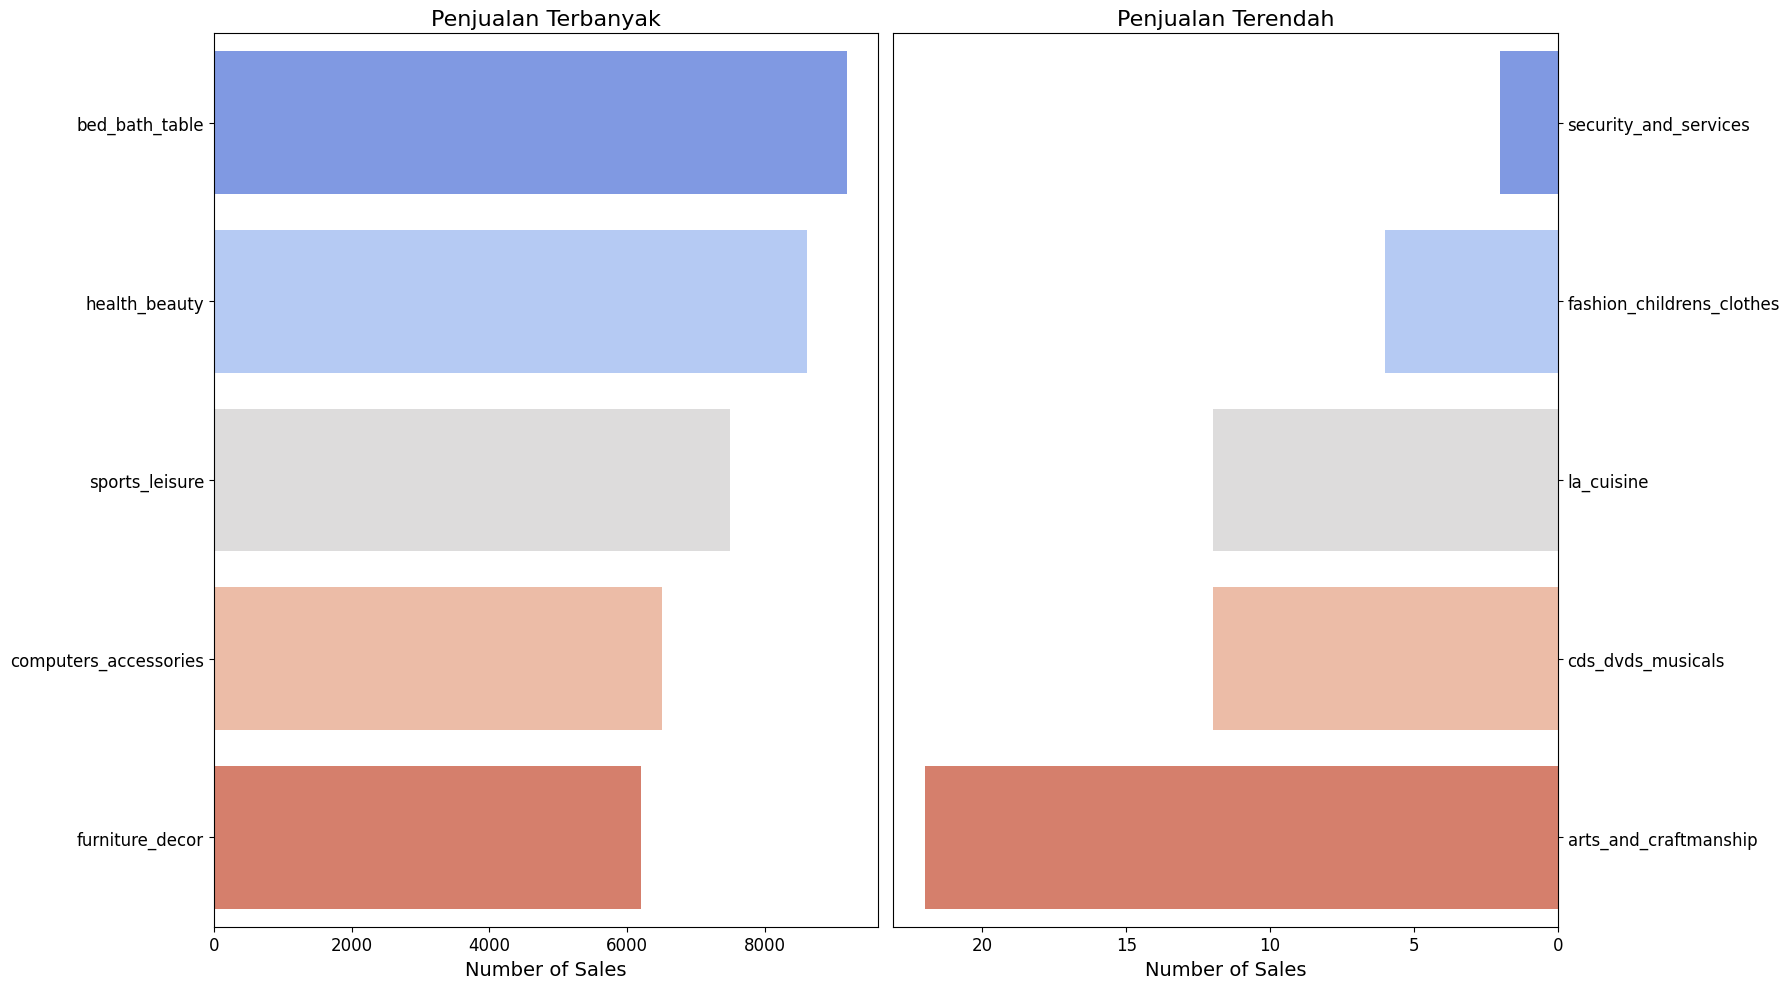

In [76]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/mmhdagungg/e-commerce-public-data-analyst/refs/heads/main/dashboard/df.csv")

sum_order_items_df = order_items_df.groupby('product_category_name_english').agg(
    product_count=('order_item_id', 'count')
).reset_index()

total_items = sum_order_items_df["product_count"].sum()
avg_items = sum_order_items_df["product_count"].mean()

# Print hasil total dan rata-rata
print(f"Total Items: {total_items}")
print(f"Rata-rata Items: {avg_items}")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

#penjualan terbanyak
top_sales = sum_order_items_df.sort_values(by="product_count", ascending=False).head(5)
sns.barplot(x="product_count", y="product_category_name_english",
            data=top_sales, palette="coolwarm", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=14)
ax[0].set_title("Penjualan Terbanyak", loc="center", fontsize=16)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

#penjualan terendah
sns.barplot(x="product_count", y="product_category_name_english",
            data=sum_order_items_df.sort_values(by="product_count", ascending=True).head(5), palette="coolwarm", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Penjualan Terendah", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

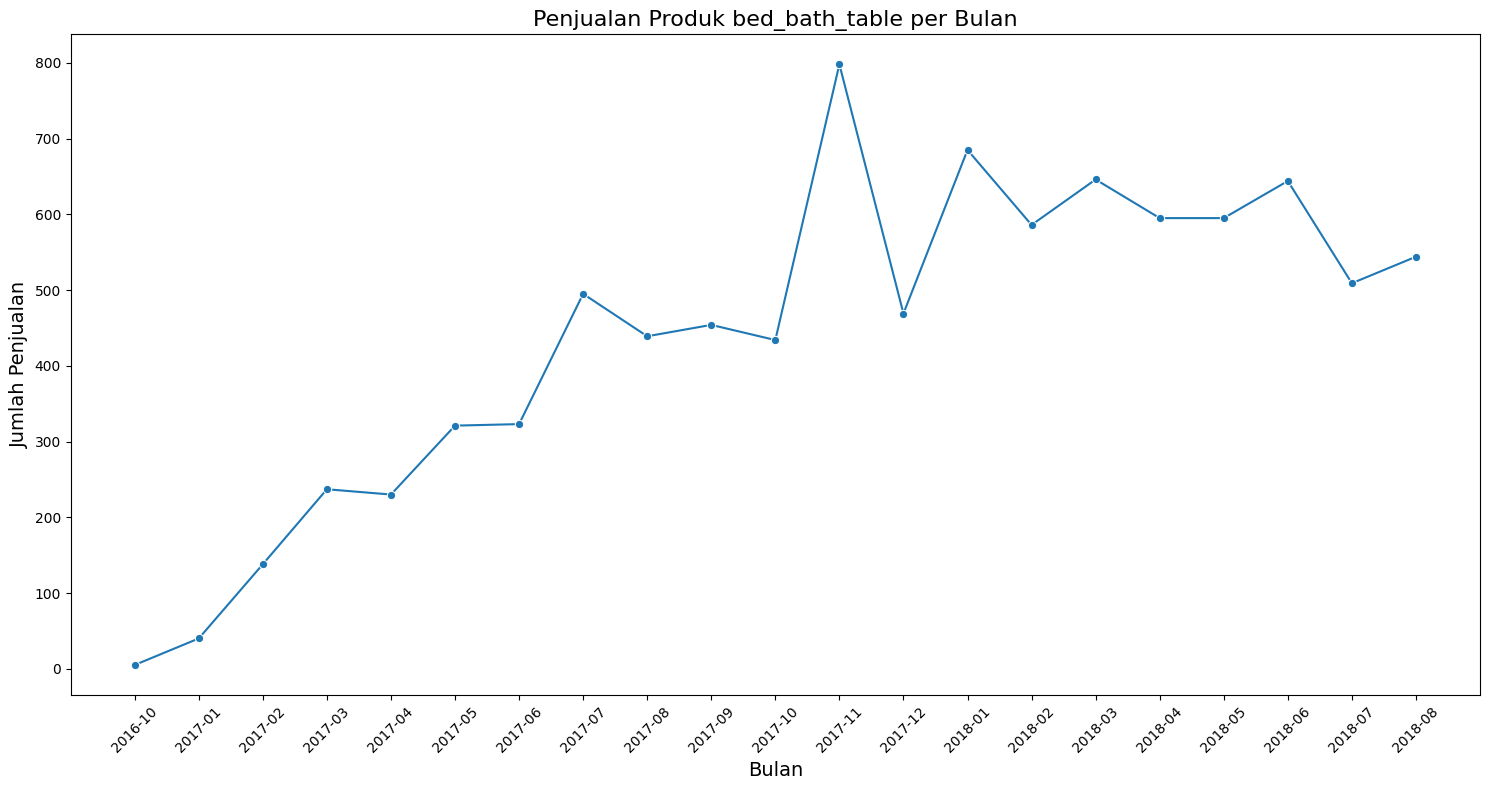

In [82]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/mmhdagungg/e-commerce-public-data-analyst/refs/heads/main/dashboard/df.csv")

# Konversi kolom timestamp menjadi tipe datetime
order_items_df['order_purchase_timestamp'] = pd.to_datetime(order_items_df['order_purchase_timestamp'])

# Tambahkan kolom bulan dan tahun
order_items_df['month_year'] = order_items_df['order_purchase_timestamp'].dt.to_period('M')

# Konversi 'month_year' ke string agar bisa dipakai di seaborn plot
order_items_df['month_year'] = order_items_df['month_year'].astype(str)

# Kelompokkan berdasarkan kategori produk dan bulan
sum_order_items_df_by_month = order_items_df.groupby(['product_category_name_english', 'month_year']).agg(
    product_count=('order_item_id', 'count')
).reset_index()

# Plot penjualan per bulan untuk kategori produk tertentu
plt.figure(figsize=(15, 8))

# Misalnya kita ambil salah satu kategori, kamu bisa menggantinya dengan kategori lain
category = "bed_bath_table"  # ganti dengan kategori lain jika diperlukan
category_sales = sum_order_items_df_by_month[sum_order_items_df_by_month['product_category_name_english'] == category]

# Membuat line plot
sns.lineplot(x='month_year', y='product_count', data=category_sales, marker='o')

# Menambahkan label dan judul
plt.title(f'Penjualan Produk {category} per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Penjualan', fontsize=14)

# Rotasi label bulan agar terbaca jelas
plt.xticks(rotation=45)

# Tampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2: lokasi mana yang customernnya paling banyak?

In [77]:
# hitung banyaknya state berdasarkan zip code
other_state_geolocation = data['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')

# seleksi zip codes yang memiliki lebih dari satu state
other_state_geolocation[other_state_geolocation['count']>= 2].shape

# mengelompokkan berdasarkan zip code prefix dan state, hitung ukuran tiap kelompok, kemudian menghapus duplikasi berdasarkan zip code prefix dan hapus kolom count
max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [78]:
# mengelompokkan data berdasarkan zip code prefix, city, dan state
geolocation_silver = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()

# menggabungkan data dengan max_state
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [79]:
# merge customer dengan geolocation
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',
                                      right_on='geolocation_zip_code_prefix',how='inner')

customers_silver.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26 00:00:00,2017-05-30 22:34:40,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30 00:00:00,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30 00:00:00,2018-02-10 22:43:29,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15 00:00:00,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15 00:00:00,2018-06-15 12:10:59,1151,são paulo,SP,-23.531294,-46.656866
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29 00:00:00,2018-04-02 18:36:47,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10 00:00:00,2018-08-17 01:59:52,13056,campinas,SP,-22.974331,-47.142173
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29 00:00:00,2017-10-01 21:52:53,89254,jaragua do sul,SC,-26.471435,-49.114562
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29 00:00:00,2017-10-01 21:52:53,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,bc88d3b86fa8443d42894eb7b5f0d73c,5.0,0.0,2018-02-21 00:00:00,2018-02-26 13:53:18,4534,sao paulo,SP,-23.583998,-46.673524


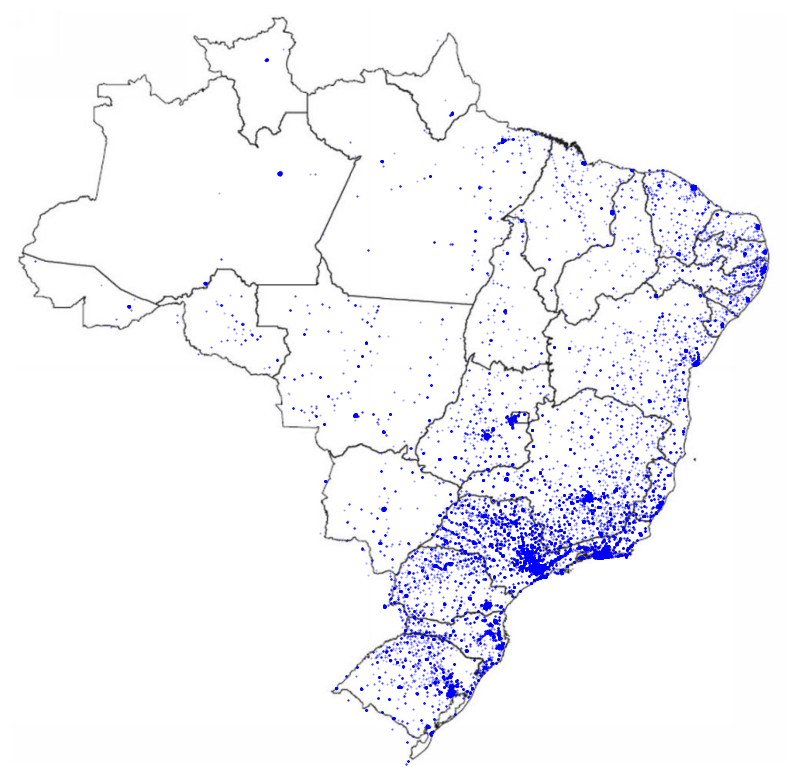

In [80]:
# hapus duplikasi berdasarkan  order_id
customers_silver = customers_silver.drop_duplicates('order_id')

# export
customers_silver.to_csv("drive/My Drive/Bangkit/data/geolocation.csv", index=False)

def plot_map(data):
    # membaca peta brzil
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

plot_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## Conclusion

###Produk manakah yang paling banyak terjual dan paling sedikit terjual? bagaimana performa produk terjual terbanyak dalam rentang perbulan?
- Produk yang paling banyak terjual adalah bed_bath_table dan yang paling sedikit terjual adah security_and_services. Berdasarkan grafik produk bed_bath_table, didapatkan tren yang baik terutama di bulan November 2017 mengalami kenaikan yang cukup signifikan, dengan informasi sebagai berikut perusahaan dapat meningkatkan produk bed_bath_table untuk meningkatkan revenue perusahaan.


###Lokasi mana yang customernya paling banyak?
- Berdasarkan grafik yang ditampilkan customer terbanyak berada di State Sao Paulo yang berjumlah 40.000 dengan informasi sebagai berikut perusaahan dapat menambah jumlah stok untuk menjaga ketersediaan stok sehingga tidak kehabisan stok pada state dengan penjualan tertinggi.